### Import Data

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"/Users/jungjungchen/Downloads/big4_financial_risk_compliance.csv"  
df = pd.read_csv(file_path)

### Understand the Structure

In [50]:
df.head()

,Year,Firm_Name,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Industry_Affected,Total_Revenue_Impact,AI_Used_for_Auditing,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
0,2020,PwC,2829,51,123,39,Healthcare,114.24,No,57,5.8,8.4
1,2022,Deloitte,3589,185,30,60,Healthcare,156.98,Yes,58,5.3,6.7
2,2020,PwC,2438,212,124,97,Healthcare,131.83,No,76,6.1,6.2
3,2021,PwC,2646,397,55,97,Healthcare,229.11,No,60,5.1,8.6
4,2020,PwC,2680,216,99,46,Healthcare,48.00,No,51,9.1,6.7


In [51]:
df.dtypes

Year                           int64
Firm_Name                     object
Total_Audit_Engagements        int64
High_Risk_Cases                int64
Compliance_Violations          int64
Fraud_Cases_Detected           int64
Industry_Affected             object
Total_Revenue_Impact         float64
AI_Used_for_Auditing          object
Employee_Workload              int64
Audit_Effectiveness_Score    float64
Client_Satisfaction_Score    float64
dtype: object

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       100 non-null    int64  
 1   Firm_Name                  100 non-null    object 
 2   Total_Audit_Engagements    100 non-null    int64  
 3   High_Risk_Cases            100 non-null    int64  
 4   Compliance_Violations      100 non-null    int64  
 5   Fraud_Cases_Detected       100 non-null    int64  
 6   Industry_Affected          100 non-null    object 
 7   Total_Revenue_Impact       100 non-null    float64
 8   AI_Used_for_Auditing       100 non-null    object 
 9   Employee_Workload          100 non-null    int64  
 10  Audit_Effectiveness_Score  100 non-null    float64
 11  Client_Satisfaction_Score  100 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 9.5+ KB


In [53]:
df.shape

(100, 12)

### Summary Statistics of the Numerical Columns

In [54]:
df.describe()

,Year,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Total_Revenue_Impact,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2022.320000,2784.520000,277.730000,105.480000,52.700000,272.539000,60.250000,7.490000,7.339000
std,1.780251,1281.863073,135.735174,55.370101,28.311221,139.151401,11.163048,1.516209,1.429127
min,2020.000000,603.000000,51.000000,10.000000,5.000000,33.460000,40.000000,5.000000,5.000000
25%,2021.000000,1768.250000,162.500000,54.500000,27.000000,155.217500,52.750000,6.100000,6.100000
50%,2022.000000,2650.000000,293.000000,114.500000,54.000000,264.450000,60.000000,7.450000,7.350000
75%,2024.000000,4008.750000,395.500000,149.500000,74.500000,406.090000,68.000000,8.825000,8.525000
max,2025.000000,4946.000000,500.000000,200.000000,100.000000,497.060000,80.000000,10.000000,10.000000


### Summary Statistics of the Categorical Columns

In [55]:
df.describe(include='object')

,Firm_Name,Industry_Affected,AI_Used_for_Auditing
count,100,100,100
unique,4,4,2
top,Deloitte,Tech,No
freq,30,29,55


### Checking for Missing Values

In [56]:
df.isnull().sum()

Year                         0
Firm_Name                    0
Total_Audit_Engagements      0
High_Risk_Cases              0
Compliance_Violations        0
Fraud_Cases_Detected         0
Industry_Affected            0
Total_Revenue_Impact         0
AI_Used_for_Auditing         0
Employee_Workload            0
Audit_Effectiveness_Score    0
Client_Satisfaction_Score    0
dtype: int64

### Checking for Duplicates

In [57]:
df.duplicated().sum()

0

### Explore Categorical Columns

In [58]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col} Unique Values: {df[col].nunique()}")
    print(df[col].value_counts(), "\n")

Firm_Name Unique Values: 4
Deloitte         30
PwC              25
Ernst & Young    23
KPMG             22
Name: Firm_Name, dtype: int64 

Industry_Affected Unique Values: 4
Tech          29
Retail        27
Healthcare    24
Finance       20
Name: Industry_Affected, dtype: int64 

AI_Used_for_Auditing Unique Values: 2
No     55
Yes    45
Name: AI_Used_for_Auditing, dtype: int64 



### Convert Types

In [59]:
df["AI_Used_for_Auditing"] = df["AI_Used_for_Auditing"].astype("category")
df["Industry_Affected"] = df["Industry_Affected"].astype("category")

### Correlations

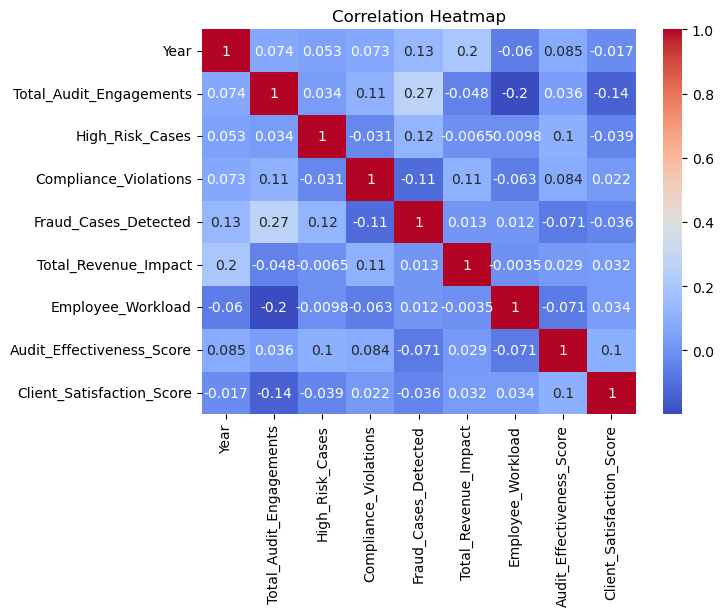

In [60]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(7, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Data Visualize Distributions

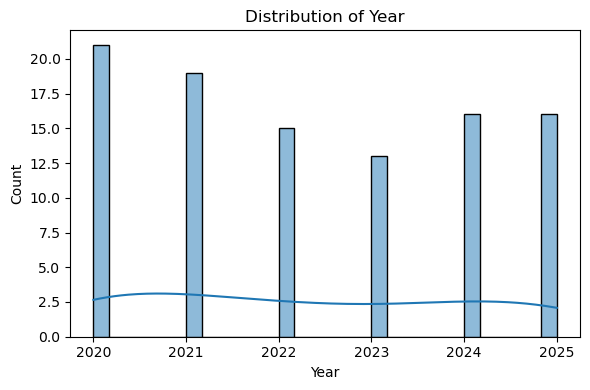

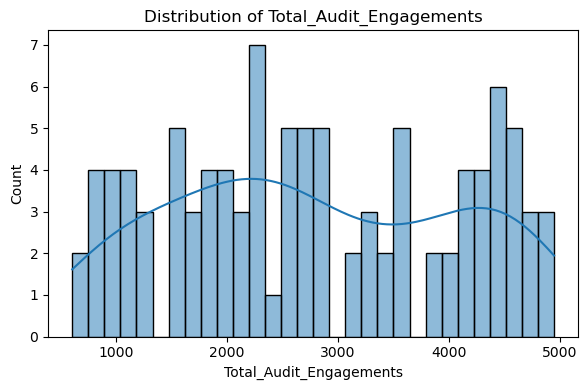

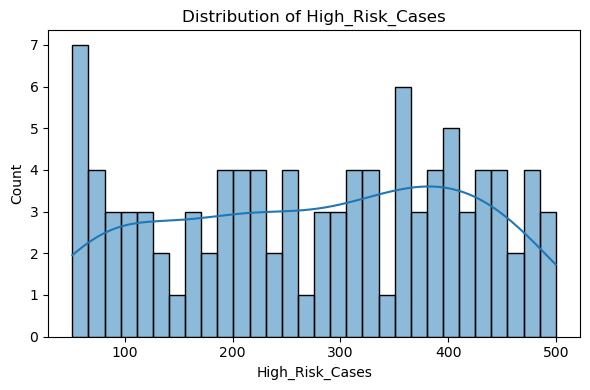

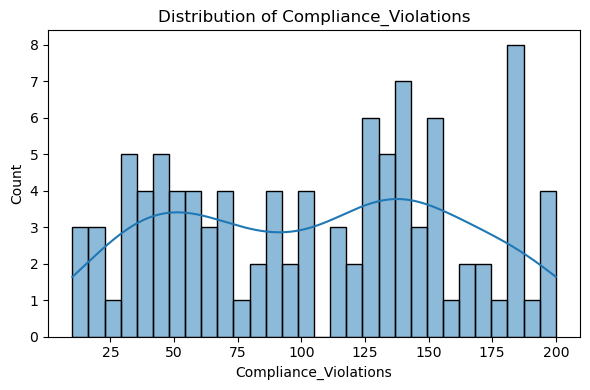

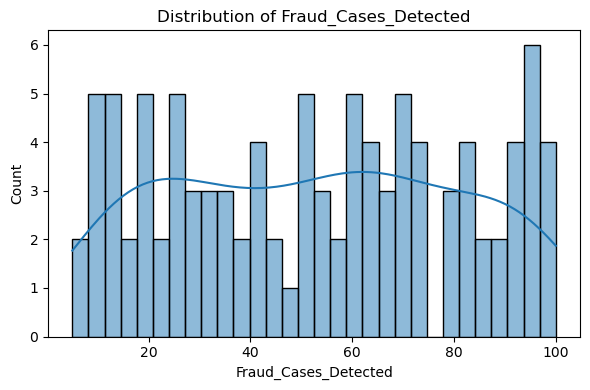

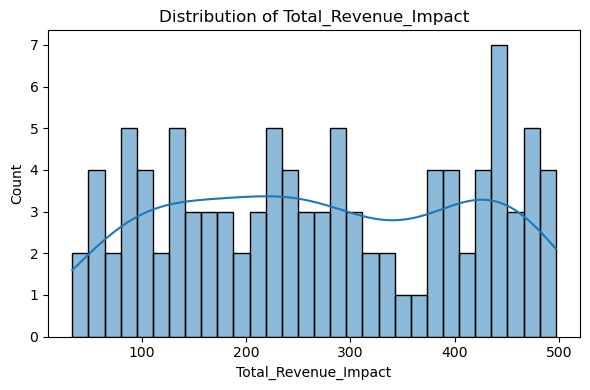

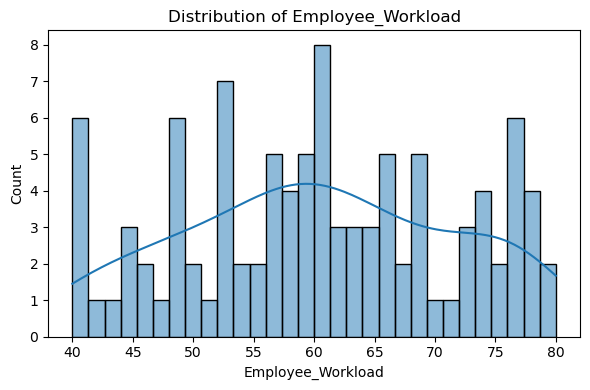

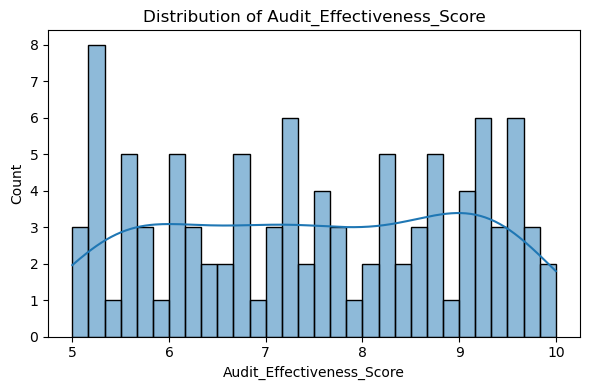

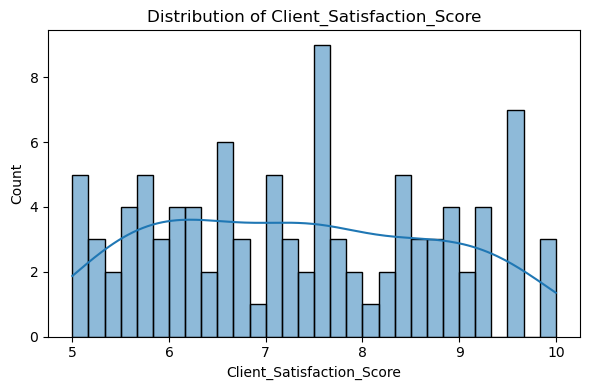

In [61]:
numeric_df = df.select_dtypes(include='number')  

for col in numeric_df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(x=col, data=df, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()